# Import Libraries

In [35]:
import tensorflow as tf
from keras.utils import np_utils
from keras.optimizers import SGD,Adam
from keras.models import Model,Sequential
from keras.layers import Dense, Dropout, Flatten ,BatchNormalization 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation
from sklearn.model_selection import train_test_split
import random as rnd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [38]:
#load MNIST Fashion Dataset from keras
#it is consists of 60000 training example and 10000 for testing
#each image is 28*28 in grayscale
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [39]:
ClassesMap = {
0 : 'T-shirt' ,
1 : 'Trouser' ,
2 : 'Pullover' ,
3 : 'Dress' ,
4 : 'Coat' ,
5 : 'Sandal' ,
6 : 'Shirt' ,
7 : 'Sneaker' ,
8 : 'Bag' ,
9 : 'Ankle Boots'}

# Reshape And Normalize The Data

In [20]:
NUMBER_OF_TRAIN_EXAMPLES = x_train.shape[0]
NUMBER_OF_TEST_EXAMPLES = x_test.shape[0]

#reshape train input data from 60000*28*28 shape to 60000*784
#reshape test input data from 10000*28*28  shape to 10000*784
x_train = x_train.reshape(NUMBER_OF_TRAIN_EXAMPLES ,-1)
x_test = x_test.reshape(NUMBER_OF_TEST_EXAMPLES ,-1)

#get copy of data because is read-only
X_train = x_train.copy()
X_test = x_test.copy()
Y_train = y_train.copy()
Y_test = y_test.copy()

#change input data type from int to float32 for normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#normalize input data
X_train /= 255
X_test /= 255

#convert class vectors to binary class matrice eg.(3 -> 0000000100)
Y_train = np_utils.to_categorical(Y_train ,10)
Y_test = np_utils.to_categorical(Y_test ,10)

#get number of features and number of number of classes
NUMBER_OF_FEATURES = X_train.shape[1]
NUMBER_OF_CLASSES = Y_train.shape[1]

#split train data to validation data and train data
X_train , X_validate ,Y_train , Y_validate = train_test_split(X_train ,Y_train ,test_size = 0.2 ,random_state = 12345)

#update values
NUMBER_OF_TRAIN_EXAMPLES = X_train.shape[0]
NUMBER_OF_TEST_EXAMPLES = X_test.shape[0]

#print the results
print("X_train Shape:" ,X_train.shape)
print("Y_train Shape:" ,Y_train.shape)
print("\nX_validate Shape:" ,X_validate.shape)
print("Y_validate Shape:" ,Y_validate.shape)
print("\nX_test Shape:" ,X_test.shape)
print("Y_test Shape:" ,Y_test.shape)

X_train Shape: (48000, 784)
Y_train Shape: (48000, 10)

X_validate Shape: (12000, 784)
Y_validate Shape: (12000, 10)

X_test Shape: (10000, 784)
Y_test Shape: (10000, 10)


# Draw An Example Image

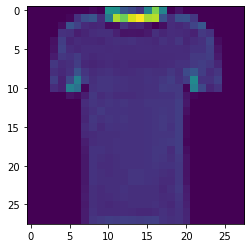

In [54]:
randomNum = rnd.randint(0,NUMBER_OF_TRAIN_EXAMPLES)
plt.imshow(np.array(x_train[randomNum]).reshape(28, 28)) 
plt.show()

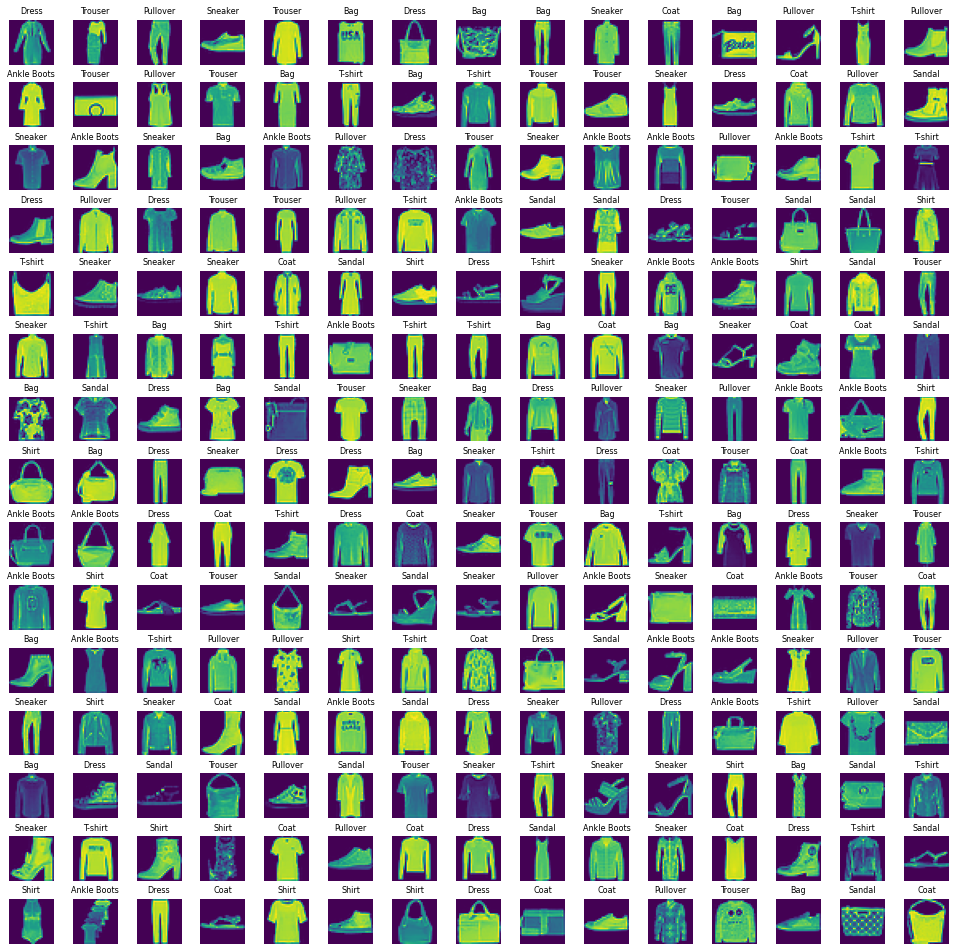

In [57]:
W_grid = 15 
L_grid = 15 

fig ,axis = plt.subplots(L_grid ,W_grid ,figsize = (17,17))

axis = axis.ravel()

for i in range(0,W_grid*L_grid):
    randomNum = rnd.randint(0 ,NUMBER_OF_TRAIN_EXAMPLES)
    axis[i].imshow(np.array(X_train[randomNum]).reshape(28, 28)) 
    axis[i].set_title(ClassesMap[y_train[randomNum]],fontsize = 8)
    axis[i].axis('off')
plt.subplots_adjust(hspace=.4)
    

# Build ANN With No Hidden Layers (Model 1)

In [21]:
model1 = Sequential()
model1.add(Dense(NUMBER_OF_CLASSES ,input_shape=(NUMBER_OF_FEATURES,)))
model1.add(Activation('softmax'))
model1.summary()
model1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['mean_squared_error','acc'])
trained_model1 = model1.fit(X_train, Y_train,validation_data=(X_validate,Y_validate),batch_size=128, epochs=100,verbose=1)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 1.5711 - mean_squared_error: 0.0679 - acc: 0.5162 - val_loss: 0.9064 - val_mean_squared_error: 0.0430 - val_acc: 0.7122
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.8607 - mean_squared_error: 0.0411 - acc: 0.7289 - val_loss: 0.7655 - val_mean_squared_error: 0.0371 - val_acc: 0.7598
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.7551 - mean_squared_error: 0.0365 - acc: 0.7597

Epoch 40/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4634 - mean_squared_error: 0.0233 - acc: 0.8413 - val_loss: 0.4609 - val_mean_squared_error: 0.0228 - val_acc: 0.8489
Epoch 41/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4674 - mean_squared_error: 0.0232 - acc: 0.8438 - val_loss: 0.4600 - val_mean_squared_error: 0.0227 - val_acc: 0.8493
Epoch 42/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4707 - mean_squared_error: 0.0233 - acc: 0.8426 - val_loss: 0.4594 - val_mean_squared_error: 0.0227 - val_acc: 0.8482
Epoch 43/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4628 - mean_squared_error: 0.0230 - acc: 0.8431 - val_loss: 0.4578 - val_mean_squared_error: 0.0226 - val_acc: 0.8480
Epoch 44/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4609 - mean_squared_error: 0.0228 - acc: 0.8452 - val_loss: 0.4569 - val_mean_squared_error: 0.0226 - val_acc: 0.8498
Epoch 45/100
375/375

Epoch 82/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4352 - mean_squared_error: 0.0217 - acc: 0.8533 - val_loss: 0.4321 - val_mean_squared_error: 0.0214 - val_acc: 0.8559
Epoch 83/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4295 - mean_squared_error: 0.0215 - acc: 0.8528 - val_loss: 0.4322 - val_mean_squared_error: 0.0214 - val_acc: 0.8558
Epoch 84/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4316 - mean_squared_error: 0.0215 - acc: 0.8540 - val_loss: 0.4319 - val_mean_squared_error: 0.0214 - val_acc: 0.8556
Epoch 85/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4271 - mean_squared_error: 0.0213 - acc: 0.8542 - val_loss: 0.4335 - val_mean_squared_error: 0.0215 - val_acc: 0.8538
Epoch 86/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4251 - mean_squared_error: 0.0211 - acc: 0.8573 - val_loss: 0.4306 - val_mean_squared_error: 0.0213 - val_acc: 0.8571
Epoch 87/100
375/375

In [22]:
score = model1.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test mse:', score[1])
print('Test accuracy:', score[2])

313/313 [==============================] - 0s 1ms/step - loss: 0.4620 - mean_squared_error: 0.0232 - acc: 0.8385
Test score: 0.46203774213790894
Test mse: 0.02318640425801277
Test accuracy: 0.8385000228881836


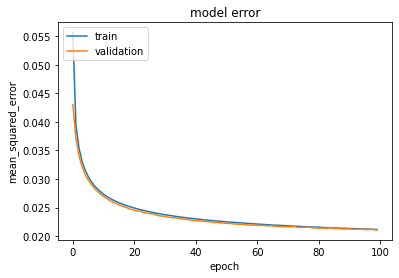

In [24]:
plt.plot(trained_model1.history['mean_squared_error'])
plt.plot(trained_model1.history['val_mean_squared_error'])
plt.title('model error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

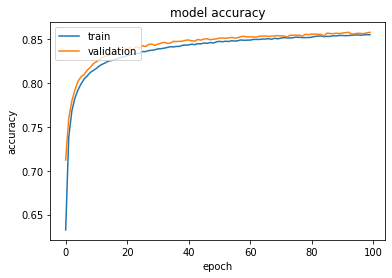

In [25]:
plt.plot(trained_model1.history['acc'])
plt.plot(trained_model1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Build ANN With Two Hidden Layers (Model 2)

In [26]:
NUMBER_OF_NEURONS_IN_HIDDEN_LAYERS = 16
DROPOUT = 0.3 
model2 = Sequential()
model2.add(Dense(128,input_shape=(NUMBER_OF_FEATURES,)))
model2.add(Activation('relu'))
model2.add(Dropout(DROPOUT))
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(DROPOUT))
model2.add(Dense(NUMBER_OF_CLASSES ))
model2.add(Activation('softmax'))
model2.summary()
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['mean_squared_error','acc'])
trained_model2 = model2.fit(X_train, Y_train,validation_data=(X_validate,Y_validate),batch_size=128, epochs=100,verbose=1)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

Epoch 36/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4256 - mean_squared_error: 0.0217 - acc: 0.8487 - val_loss: 0.3637 - val_mean_squared_error: 0.0183 - val_acc: 0.8728
Epoch 37/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4235 - mean_squared_error: 0.0215 - acc: 0.8492 - val_loss: 0.3619 - val_mean_squared_error: 0.0182 - val_acc: 0.8752
Epoch 38/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4157 - mean_squared_error: 0.0211 - acc: 0.8523 - val_loss: 0.3603 - val_mean_squared_error: 0.0182 - val_acc: 0.8743
Epoch 39/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4134 - mean_squared_error: 0.0209 - acc: 0.8534 - val_loss: 0.3606 - val_mean_squared_error: 0.0182 - val_acc: 0.8737
Epoch 40/100
375/375 [==============================] - 2s 5ms/step - loss: 0.4077 - mean_squared_error: 0.0206 - acc: 0.8572 - val_loss: 0.3556 - val_mean_squared_error: 0.0179 - val_acc: 0.8764
Epoch 41/100
375/375

Epoch 78/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3505 - mean_squared_error: 0.0181 - acc: 0.8751 - val_loss: 0.3225 - val_mean_squared_error: 0.0163 - val_acc: 0.8875
Epoch 79/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3458 - mean_squared_error: 0.0178 - acc: 0.8763 - val_loss: 0.3223 - val_mean_squared_error: 0.0163 - val_acc: 0.8864
Epoch 80/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3446 - mean_squared_error: 0.0178 - acc: 0.8760 - val_loss: 0.3211 - val_mean_squared_error: 0.0163 - val_acc: 0.8857
Epoch 81/100
375/375 [==============================] - 2s 4ms/step - loss: 0.3461 - mean_squared_error: 0.0180 - acc: 0.8738 - val_loss: 0.3219 - val_mean_squared_error: 0.0163 - val_acc: 0.8863
Epoch 82/100
375/375 [==============================] - 1s 4ms/step - loss: 0.3472 - mean_squared_error: 0.0179 - acc: 0.8764 - val_loss: 0.3197 - val_mean_squared_error: 0.0162 - val_acc: 0.8878
Epoch 83/100
375/375

In [27]:
score = model2.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test mse:', score[1])
print('Test accuracy:', score[2])

313/313 [==============================] - 1s 2ms/step - loss: 0.3499 - mean_squared_error: 0.0179 - acc: 0.8741
Test score: 0.34992313385009766
Test mse: 0.017914727330207825
Test accuracy: 0.8741000294685364


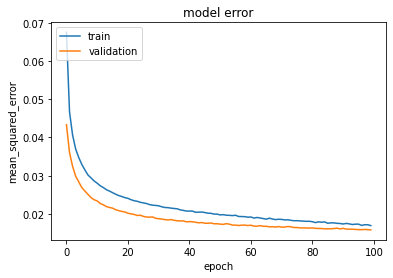

In [28]:
plt.plot(trained_model2.history['mean_squared_error'])
plt.plot(trained_model2.history['val_mean_squared_error'])
plt.title('model error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

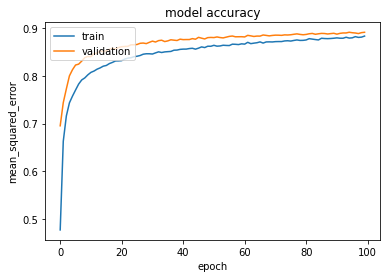

In [29]:
plt.plot(trained_model2.history['acc'])
plt.plot(trained_model2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Build Simple CNN (Model 3)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

NUMBER_OF_TRAIN_EXAMPLES = x_train.shape[0]
NUMBER_OF_TEST_EXAMPLES = x_test.shape[0]

x_train = x_train.reshape((NUMBER_OF_TRAIN_EXAMPLES, 28, 28, 1))
x_test = x_test.reshape((NUMBER_OF_TEST_EXAMPLES, 28, 28, 1))

#get copy of data because is read-only
X_train = x_train.copy()
X_test = x_test.copy()
Y_train = y_train.copy()
Y_test = y_test.copy()

#change input data type from int to float32 for normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')



#normalize input data
X_train /= 255
X_test /= 255

#convert class vectors to binary class matrice eg.(3 -> 0000000100)
Y_train = np_utils.to_categorical(Y_train ,10)
Y_test = np_utils.to_categorical(Y_test ,10)

#get number of features and number of number of classes
NUMBER_OF_FEATURES = X_train.shape[1]
NUMBER_OF_CLASSES = Y_train.shape[1]

#split train data to validation data and train data
X_train , X_validate ,Y_train , Y_validate = train_test_split(X_train ,Y_train ,test_size = 0.2 ,random_state = 12345)

#update values
NUMBER_OF_TRAIN_EXAMPLES = X_train.shape[0]
NUMBER_OF_TEST_EXAMPLES = X_test.shape[0]

#print the results
print("X_train Shape:" ,X_train.shape)
print("Y_train Shape:" ,Y_train.shape)
print("\nX_validate Shape:" ,X_validate.shape)
print("Y_validate Shape:" ,Y_validate.shape)
print("\nX_test Shape:" ,X_test.shape)
print("Y_test Shape:" ,Y_test.shape)

X_train Shape: (48000, 28, 28, 1)
Y_train Shape: (48000, 10)

X_validate Shape: (12000, 28, 28, 1)
Y_validate Shape: (12000, 10)

X_test Shape: (10000, 28, 28, 1)
Y_test Shape: (10000, 10)


In [66]:
model3 = Sequential()
model3.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model3.add(Dropout(0.25)) 
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(32, activation='relu'))
#model3.add(Dropout(0.25))
model3.add(Dense(10, activation='softmax'))
model3.summary()
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mean_squared_error','acc'])
trained_model3 = model3.fit(X_train, Y_train,validation_data=(X_validate,Y_validate),batch_size=128, epochs=35,verbose=1)


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
dropout_21 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 2704)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 32)                86560     
_________________________________________________________________
dropout_22 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 10)              

# Evaluate 4 Kernal Model Without Dropout (SGD Opt.)

In [17]:
score_4_wo_dropout = model3.evaluate(X_test, Y_test, verbose=1)
print("Test score:", np.around(score_4_wo_dropout[0],decimals=4))
print("Test mse:", np.around(score_4_wo_dropout[1],decimals=4))
print("Test accuracy:", np.around(score_4_wo_dropout[2]*100,decimals=2),"%")

313/313 [==============================] - 1s 2ms/step - loss: 0.3308 - mean_squared_error: 0.0169 - acc: 0.8837: 0s - loss: 0.3326 - mean_squared_error: 0.0170 - acc: 
Test score: 0.3308
Test mse: 0.0169
Test accuracy: 88.37 %


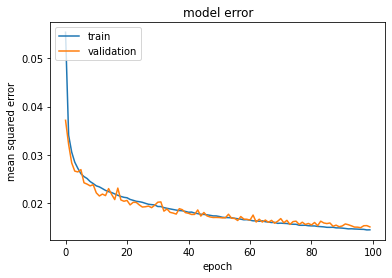

In [18]:
plt.plot(trained_model3.history['mean_squared_error'])
plt.plot(trained_model3.history['val_mean_squared_error'])
plt.title('model error')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

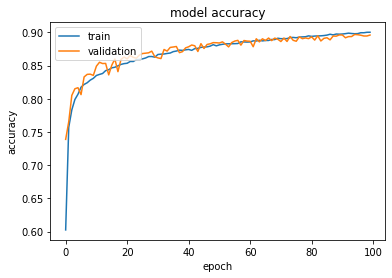

In [19]:
plt.plot(trained_model3.history['acc'])
plt.plot(trained_model3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Evaluate 8 Kernal Model Without Dropout (SGD Opt.)

In [13]:
score_8_wo_dropout = model3.evaluate(X_test, Y_test, verbose=1)
print("Test score:", np.around(score_8_wo_dropout[0],decimals=4))
print("Test mse:", np.around(score_8_wo_dropout[1],decimals=4))
print("Test accuracy:", np.around(score_8_wo_dropout[2]*100,decimals=2),"%")

313/313 [==============================] - 1s 2ms/step - loss: 0.3172 - mean_squared_error: 0.0162 - acc: 0.8883
Test score: 0.3172
Test mse: 0.0162
Test accuracy: 88.83 %


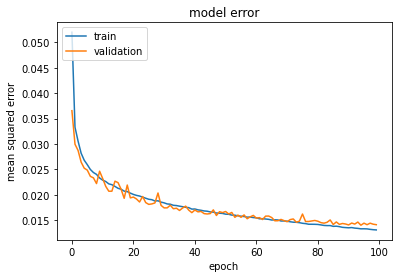

In [14]:
plt.plot(trained_model3.history['mean_squared_error'])
plt.plot(trained_model3.history['val_mean_squared_error'])
plt.title('model error')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

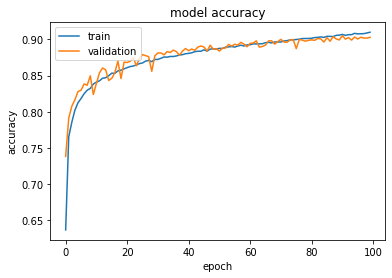

In [15]:
plt.plot(trained_model3.history['acc'])
plt.plot(trained_model3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Evaluate 16 Kernal Model Without Dropout

In [21]:
score_16_wo_dropout = model3.evaluate(X_test, Y_test, verbose=1)
print("Test score:", np.around(score_16_wo_dropout[0],decimals=4))
print("Test mse:", np.around(score_16_wo_dropout[1],decimals=4))
print("Test accuracy:", np.around(score_16_wo_dropout[2]*100,decimals=2),"%")

313/313 [==============================] - 1s 2ms/step - loss: 0.2932 - mean_squared_error: 0.0151 - acc: 0.8935
Test score: 0.2932
Test mse: 0.0151
Test accuracy: 89.35 %


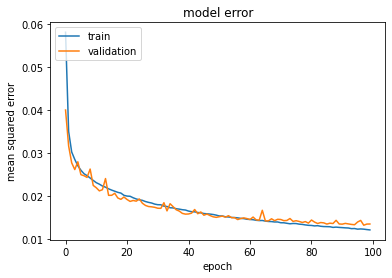

In [22]:
plt.plot(trained_model3.history['mean_squared_error'])
plt.plot(trained_model3.history['val_mean_squared_error'])
plt.title('model error')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

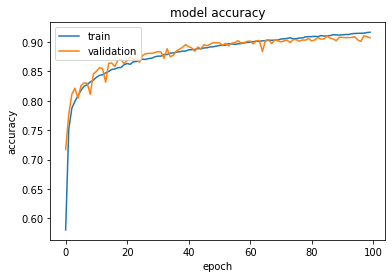

In [23]:
plt.plot(trained_model3.history['acc'])
plt.plot(trained_model3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Evaluate 32 Kernal Model Without Dropout

In [25]:
score_32_wo_dropout = model3.evaluate(X_test, Y_test, verbose=1)
print("Test score:", np.around(score_32_wo_dropout[0],decimals=4))
print("Test mse:", np.around(score_32_wo_dropout[1],decimals=4))
print("Test accuracy:", np.around(score_32_wo_dropout[2]*100,decimals=2),"%")

313/313 [==============================] - 1s 3ms/step - loss: 0.2890 - mean_squared_error: 0.0148 - acc: 0.9006
Test score: 0.289
Test mse: 0.0148
Test accuracy: 90.06 %


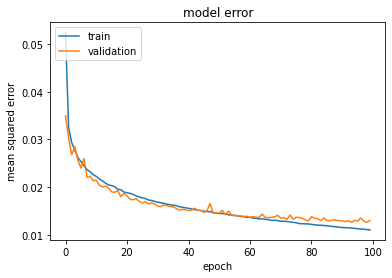

In [109]:
plt.plot(trained_model3.history['mean_squared_error'])
plt.plot(trained_model3.history['val_mean_squared_error'])
plt.title('model error')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(trained_model3.history['acc'])
plt.plot(trained_model3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Evaluate 64 Kernal Model Without Dropout

In [27]:
score_64_wo_dropout = model3.evaluate(X_test, Y_test, verbose=1)
print("Test score:", np.around(score_64_wo_dropout[0],decimals=4))
print("Test mse:", np.around(score_64_wo_dropout[1],decimals=4))
print("Test accuracy:", np.around(score_64_wo_dropout[2]*100,decimals=2),"%")

313/313 [==============================] - 2s 5ms/step - loss: 0.2802 - mean_squared_error: 0.0143 - acc: 0.9022
Test score: 0.2802
Test mse: 0.0143
Test accuracy: 90.22 %


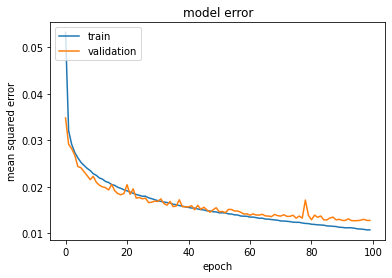

In [28]:
plt.plot(trained_model3.history['mean_squared_error'])
plt.plot(trained_model3.history['val_mean_squared_error'])
plt.title('model error')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

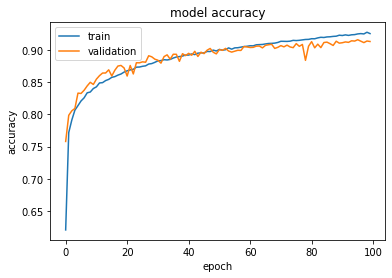

In [29]:
plt.plot(trained_model3.history['acc'])
plt.plot(trained_model3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#  Will Optomize Our Model By Adding Two Layer Of Dropout And Use Adam Optomizer

# Evaluate 16 Kernal Model With Dropout (Adam Opt.)

In [16]:
score_16_w_dropout_adam = model3.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score_16_w_dropout_adam[0])
print('Test mse:', score_16_w_dropout_adam[1])
print('Test accuracy:', score_16_w_dropout_adam[2])

313/313 [==============================] - 1s 4ms/step - loss: 0.2628 - mean_squared_error: 0.0126 - acc: 0.9127
Test score: 0.2628036141395569
Test mse: 0.012583266012370586
Test accuracy: 0.9126999974250793


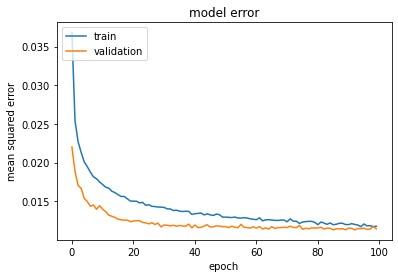

In [17]:
plt.plot(trained_model3.history['mean_squared_error'])
plt.plot(trained_model3.history['val_mean_squared_error'])
plt.title('model error')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Evaluate 32 Kernal Model With Dropout (Adam Opt.)

In [19]:
score_32_w_dropout_adam = model3.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score_32_w_dropout_adam[0])
print('Test mse:', score_32_w_dropout_adam[1])
print('Test accuracy:', score_32_w_dropout_adam[2])

313/313 [==============================] - 2s 5ms/step - loss: 0.2832 - mean_squared_error: 0.0125 - acc: 0.9160
Test score: 0.2832231819629669
Test mse: 0.012533236294984818
Test accuracy: 0.9160000085830688


# Evaluate 64 Kernal Model With Dropout (Adam Opt.)

In [32]:
score_64_wo_dropout_adam = model3.evaluate(X_test, Y_test, verbose=1)
print("Test score:", np.around(score_64_wo_dropout_adam[0],decimals=4))
print("Test mse:", np.around(score_64_wo_dropout_adam[1],decimals=4))
print("Test accuracy:", np.around(score_64_wo_dropout_adam[2]*100,decimals=2),"%")

313/313 [==============================] - 1s 5ms/step - loss: 0.3470 - mean_squared_error: 0.0131 - acc: 0.9135
Test score: 0.347
Test mse: 0.0131
Test accuracy: 91.35 %


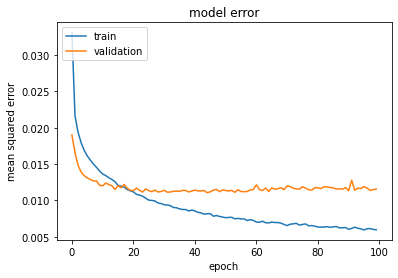

In [33]:
plt.plot(trained_model3.history['mean_squared_error'])
plt.plot(trained_model3.history['val_mean_squared_error'])
plt.title('model error')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(trained_model3.history['acc'])
plt.plot(trained_model3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

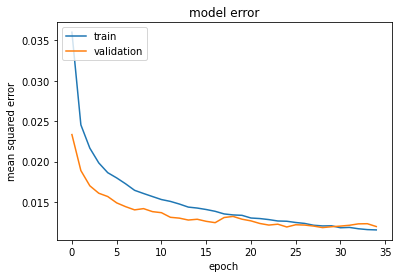

In [68]:
plt.plot(trained_model3.history['mean_squared_error'])
plt.plot(trained_model3.history['val_mean_squared_error'])
plt.title('model error')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

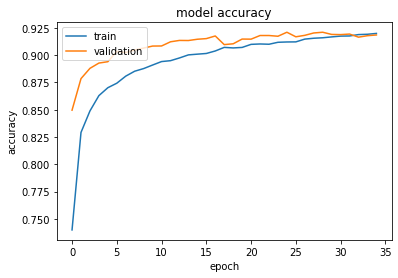

In [69]:
plt.plot(trained_model3.history['acc'])
plt.plot(trained_model3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [67]:
score_64_wo_dropout_adam = model3.evaluate(X_test, Y_test, verbose=1)
print("Test score:", np.around(score_64_wo_dropout_adam[0],decimals=4))
print("Test mse:", np.around(score_64_wo_dropout_adam[1],decimals=4))
print("Test accuracy:", np.around(score_64_wo_dropout_adam[2]*100,decimals=2),"%")

313/313 [==============================] - 1s 2ms/step - loss: 0.2695 - mean_squared_error: 0.0134 - acc: 0.9094
Test score: 0.2695
Test mse: 0.0134
Test accuracy: 90.94 %
